# Toma de decisiones basadas en datos

En el siguiente analisis se busca ayudar al Sr. Juan a decidir cual de sus cuatros tiendas de su cadena Alura Store deberia vender para iniciar un nuevo emprendimiento. Para ello, se analiza datos de ventas, rendimiento y reseñas de las 4 tiendas. El objetivo es identificar la tienda menos eficiente y presentar una recomendacion final basada en los datos.

### Importación de datos



In [50]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [51]:
tienda.shape

(2359, 12)

# 1. Análisis de facturación

Vamos a calcular el ingreso total por tienda sumando los valores de la columna __Precio__ ya que estos corresponden a los productos comprados por los clientes. Cada registro corresponde a la compra de un cliente.

## 1.1 Ingreso total por tienda

In [52]:
# lista para guardar los ingresos de cada tienda
ingresos = []

# lista con los nombres de cada tienda
tiendas = ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']

In [53]:
# ingreso tienda 1
ingreso_total_T1 = tienda.Precio.sum()
ingresos.append(ingreso_total_T1)
ingreso_total_T1

1150880400.0

In [54]:
# ingreso tienda 2
ingreso_total_T2 = tienda2.Precio.sum()
ingresos.append(ingreso_total_T2)
ingreso_total_T2

1116343500.0

In [55]:
# ingreso tienda 3
ingreso_total_T3 = tienda3.Precio.sum()
ingresos.append(ingreso_total_T3)
ingreso_total_T3

1098019600.0

In [56]:
# ingreso tienda 4
ingreso_total_T4 = tienda4.Precio.sum()
ingresos.append(ingreso_total_T4)
ingreso_total_T4

1038375700.0

In [57]:
# dataframe con los ingresos por tienda
tiendas_df = pd.DataFrame({
    'Tiendas': tiendas,
    'Ingreso_Total':ingresos
})

tiendas_df

,Tiendas,Ingreso_Total
0,Tienda_1,1.150880e+09
1,Tienda_2,1.116344e+09
2,Tienda_3,1.098020e+09
3,Tienda_4,1.038376e+09


> La tienda 4 es la que menos ingresos ha tenido

> La tienda 1 es la que presenta mayores ingresos.

## 1.2 Ventas por categoría

Vamos a obtener los nombres de cada categoria

In [58]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

Ahora, calculamos la cantidad de productos vendidos por categoria para cada tienda.

In [59]:
# cantidad de productos vendidos por categoria de la tienda 1
conteo_T1 = tienda['Categoría del Producto'].value_counts().reset_index()
conteo_T1.columns = ['Categoria', 'Cantidad_T1']

# cantidad de productos vendidos por categoria de la tienda 2
conteo_T2 = tienda2['Categoría del Producto'].value_counts().reset_index()
conteo_T2.columns = ['Categoria', 'Cantidad_T2']

# cantidad de productos vendidos por categoria de la tienda 3
conteo_T3 = tienda3['Categoría del Producto'].value_counts().reset_index()
conteo_T3.columns = ['Categoria', 'Cantidad_T3']

# cantidad de productos vendidos por categoria de la tienda 1
conteo_T4 = tienda4['Categoría del Producto'].value_counts().reset_index()
conteo_T4.columns = ['Categoria', 'Cantidad_T4']

Unimos los resultados de cada tienda en un mismo dataframe para realizar una comparacion numerica. 

In [60]:
from functools import reduce

conteos_df = [conteo_T1, conteo_T2, conteo_T3, conteo_T4]
df_categorias_tiendas = reduce(lambda left, right: pd.merge(left, right, on='Categoria'), conteos_df)
df_categorias_tiendas

,Categoria,Cantidad_T1,Cantidad_T2,Cantidad_T3,Cantidad_T4
0,Muebles,465,442,499,480
1,Electrónicos,448,422,451,451
2,Juguetes,324,313,315,338
3,Electrodomésticos,312,305,278,254
4,Deportes y diversión,284,275,277,277
5,Instrumentos musicales,182,224,177,170
6,Libros,173,197,185,187
7,Artículos para el hogar,171,181,177,201


> Las 3 categorias mas vendidas de todas las tiendas son: Muebles, electronicos y juguetes.

> La tienda 3 posee mayor cantidad de ventas de muebles con un total de 499 unidades.

> Las tiendas 3 y 4 han vendido mayor cantidad de electronico con un total de 451 unidades.

> La tienda 4 ha vendido mayor cantidad de juguetes con un total de 338 unidades

## 1.3 Calificación promedio de la tienda


Vamos a obtener los valores unicos de calificacion.

In [61]:
# valores de la columna calificacion
tienda['Calificación'].unique()

array([4, 1, 5, 3, 2])

Calculamos el promedio de calificacion de cada tienda y lo guardamos en una lista

In [62]:
prom_cal = []

cal_prom_T1 = tienda['Calificación'].mean()
prom_cal.append(round(cal_prom_T1,2))

cal_prom_T2 = tienda2['Calificación'].mean()
prom_cal.append(round(cal_prom_T2,2))

cal_prom_T3 = tienda3['Calificación'].mean()
prom_cal.append(round(cal_prom_T3,2))

cal_prom_T4 = tienda4['Calificación'].mean()
prom_cal.append(round(cal_prom_T4,2))

prom_cal

[3.98, 4.04, 4.05, 4.0]

Agregamos la calificacion de cada tienda en el dataframe 'tiendas_df'

In [63]:
tiendas_df['Calificacion'] = prom_cal
tiendas_df 

,Tiendas,Ingreso_Total,Calificacion
0,Tienda_1,1.150880e+09,3.98
1,Tienda_2,1.116344e+09,4.04
2,Tienda_3,1.098020e+09,4.05
3,Tienda_4,1.038376e+09,4.00


> La mayoria de las tiendas promedian una calificacion aproximada de 4.

> La tienda con la mejor calificacion es la 3 con un promedio de 4.04.

> La tienda con el peor calificacion es la 1 con un promedio de 3.97.

## 1.4 Productos más y menos vendidos

Vamos a obtener el producto mas vendido por cada tienda incluyendo la cantidad, asi como el producto menos vendido

In [64]:
tiendas = [tienda, tienda2, tienda3, tienda4]

mas_vendido = []
cant_mas_vendido = []
precio_mas_vendido = []
menos_vendido = []
cant_menos_vendido = []
precio_menos_vendido = []

for df in tiendas:

    prods = df['Producto'].value_counts()
    
    more = prods.index[0]
    cant_more = prods.iloc[0]
    mas_vendido.append(more)
    cant_mas_vendido.append(cant_more)

    less = prods.index[-1]
    cant_less = prods.iloc[-1]
    menos_vendido.append(less)
    cant_menos_vendido.append(cant_less)

    precio_more = df[df['Producto'] == more]['Precio'].values[0]
    precio_less = df[df['Producto'] == less]['Precio'].values[0]
    precio_mas_vendido.append(precio_more)
    precio_menos_vendido.append(precio_less)


Agregamos los datos obtenidos al dataframe 'tiendas_df' para tener mejor resumida la informacion.

In [65]:
tiendas_df['Prod. mas vendido'] = mas_vendido
tiendas_df['Cant. mas vendido'] = cant_mas_vendido
tiendas_df['Prec. mas vendido'] = precio_mas_vendido
tiendas_df['Ingr. mas vendido'] = tiendas_df['Cant. mas vendido']*tiendas_df['Prec. mas vendido']
tiendas_df['Prod. menos vendido'] = menos_vendido
tiendas_df['Cant. menos vendido'] = cant_menos_vendido
tiendas_df['Prec. menos vendido'] = precio_menos_vendido
tiendas_df['Ingr. menos vendido'] = tiendas_df['Cant. menos vendido']*tiendas_df['Prec. menos vendido']

tiendas_df

,Tiendas,Ingreso_Total,Calificacion,Prod. mas vendido,Cant. mas vendido,Prec. mas vendido,Ingr. mas vendido,Prod. menos vendido,Cant. menos vendido,Prec. menos vendido,Ingr. menos vendido
0,Tienda_1,1.150880e+09,3.98,TV LED UHD 4K,60,1891700.0,113502000.0,Celular ABXY,33,701900.0,23162700.0
1,Tienda_2,1.116344e+09,4.04,Iniciando en programación,65,58600.0,3809000.0,Juego de mesa,32,153000.0,4896000.0
2,Tienda_3,1.098020e+09,4.05,Kit de bancas,57,336000.0,19152000.0,Bloques de construcción,35,34700.0,1214500.0
3,Tienda_4,1.038376e+09,4.00,Cama box,62,473800.0,29375600.0,Guitarra eléctrica,33,626200.0,20664600.0


> Todas las tiendas venden similares cantidades de su producto menos vendido.

> Los productos mas vendidos de cada tienda se venden en cantidades similares.

> Los ingresos que generan los productos menos y mas vendidos son mayores en las tiendas 1 y 4.

> La tienda 2 es la que menos ingresos genera por las venta de sus productos mas vendidos.

buscamos el precio de cada producto

## 1.5 Envío promedio por tienda

Vamos a obtener el costo de envio promedio por tienda, el total de envios y el total gastado de envios

In [66]:
tiendas = [tienda, tienda2, tienda3, tienda4]

prom_cost_envio = []
cant_envios = []
total_gastado = []

for df in tiendas:
    promedio = df['Costo de envío'].mean()
    cantidad = df['Costo de envío'].count()
    total = df['Costo de envío'].sum()

    prom_cost_envio.append(round(promedio, 2))
    cant_envios.append(cantidad)
    total_gastado.append(total)
    

Agregamos los resultados encontrados en el dataframe 'tiendas_df' para un mejor resumen

In [67]:
tiendas_df['Promedio Costo Envio'] = prom_cost_envio
tiendas_df['Total Envios'] = cant_envios
tiendas_df['Total Gastado por Envios'] = total_gastado

tiendas_df

,Tiendas,Ingreso_Total,Calificacion,Prod. mas vendido,Cant. mas vendido,Prec. mas vendido,Ingr. mas vendido,Prod. menos vendido,Cant. menos vendido,Prec. menos vendido,Ingr. menos vendido,Promedio Costo Envio,Total Envios,Total Gastado por Envios
0,Tienda_1,1.150880e+09,3.98,TV LED UHD 4K,60,1891700.0,113502000.0,Celular ABXY,33,701900.0,23162700.0,26018.61,2359,61377900.0
1,Tienda_2,1.116344e+09,4.04,Iniciando en programación,65,58600.0,3809000.0,Juego de mesa,32,153000.0,4896000.0,25216.24,2359,59485100.0
2,Tienda_3,1.098020e+09,4.05,Kit de bancas,57,336000.0,19152000.0,Bloques de construcción,35,34700.0,1214500.0,24805.68,2359,58516600.0
3,Tienda_4,1.038376e+09,4.00,Cama box,62,473800.0,29375600.0,Guitarra eléctrica,33,626200.0,20664600.0,23459.46,2358,55317400.0


Vamos a calcular el ingreso neto por tienda, cuyo valor se obtiene restando al Ingreso_Total, el Total Gastado por Envios.

In [68]:
tiendas_df['Ingreso Neto'] = tiendas_df['Ingreso_Total'] - tiendas_df['Total Gastado por Envios']
tiendas_df

,Tiendas,Ingreso_Total,Calificacion,Prod. mas vendido,Cant. mas vendido,Prec. mas vendido,Ingr. mas vendido,Prod. menos vendido,Cant. menos vendido,Prec. menos vendido,Ingr. menos vendido,Promedio Costo Envio,Total Envios,Total Gastado por Envios,Ingreso Neto
0,Tienda_1,1.150880e+09,3.98,TV LED UHD 4K,60,1891700.0,113502000.0,Celular ABXY,33,701900.0,23162700.0,26018.61,2359,61377900.0,1.089502e+09
1,Tienda_2,1.116344e+09,4.04,Iniciando en programación,65,58600.0,3809000.0,Juego de mesa,32,153000.0,4896000.0,25216.24,2359,59485100.0,1.056858e+09
2,Tienda_3,1.098020e+09,4.05,Kit de bancas,57,336000.0,19152000.0,Bloques de construcción,35,34700.0,1214500.0,24805.68,2359,58516600.0,1.039503e+09
3,Tienda_4,1.038376e+09,4.00,Cama box,62,473800.0,29375600.0,Guitarra eléctrica,33,626200.0,20664600.0,23459.46,2358,55317400.0,9.830583e+08


> La tienda que mayor gasto tiene por costo de envio es la 1.

> La tienda que menor gasto tiene por costo de envio es la 4.

> Al calcular el ingreso neto, queda evidenciado que la tienda 4 es la que genera menor rentabilidad.

# 2. Visualizaciones

Vamos a crear visualizaciones que nos permitan interpretar mejor los hallazgos encontrados

## 2.1 Ingreso Neto por tienda

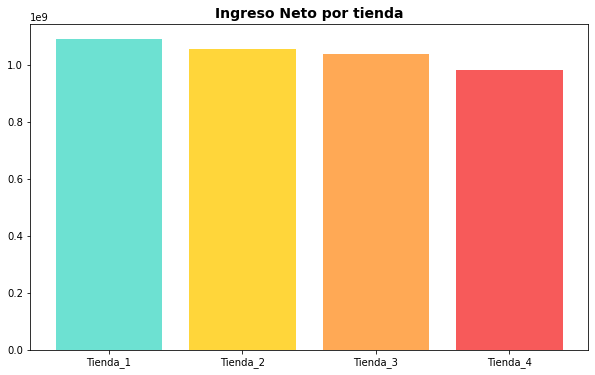

In [69]:
import matplotlib.pyplot as plt

colors = ['#6DE1D2', '#FFD63A', '#FFA955', '#F75A5A']
plt.figure(figsize=(10,6))
plt.bar(x=tiendas_df['Tiendas'], height=tiendas_df['Ingreso Neto'], color = colors)
plt.title('Ingreso Neto por tienda', fontsize=14, fontweight='bold')
plt.show()

> La grafica nos muestra que el ingreso neto de cada tienda son muy similares entre las tiendas.

> La tienda 1 es la que mayor ingreso neto posee.

> La tienda 4 es la que menor ingreso neto presenta.

## 2.2 Categorias mas vendidas

In [70]:
df_melt = df_categorias_tiendas.melt(id_vars='Categoria',
                                     value_vars=['Cantidad_T1', 'Cantidad_T2', 'Cantidad_T3', 'Cantidad_T4'],
                                     var_name='Tiendas',
                                     value_name='Cantidad')

df_melt

,Categoria,Tiendas,Cantidad
0,Muebles,Cantidad_T1,465
1,Electrónicos,Cantidad_T1,448
2,Juguetes,Cantidad_T1,324
3,Electrodomésticos,Cantidad_T1,312
4,Deportes y diversión,Cantidad_T1,284
5,Instrumentos musicales,Cantidad_T1,182
6,Libros,Cantidad_T1,173
7,Artículos para el hogar,Cantidad_T1,171
8,Muebles,Cantidad_T2,442
9,Electrónicos,Cantidad_T2,422


In [71]:
df_melt['Cantidad'] = pd.to_numeric(df_melt['Cantidad'], errors='coerce')
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  32 non-null     object
 1   Tiendas    32 non-null     object
 2   Cantidad   32 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


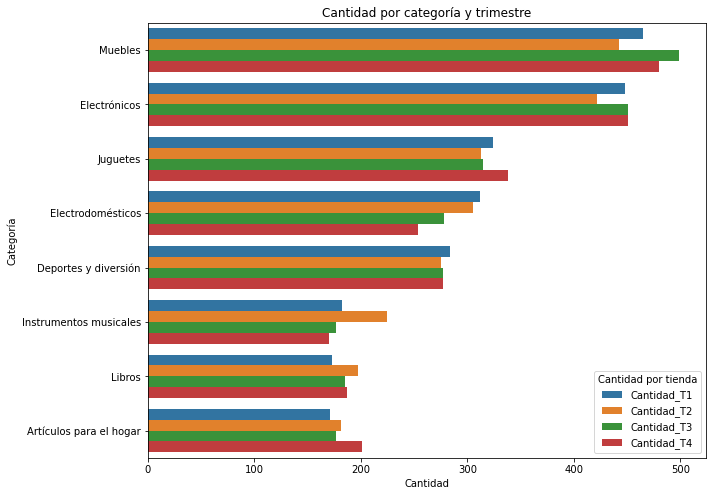

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.barplot(data=df_melt, y='Categoria', x='Cantidad', hue='Tiendas')
plt.title("Cantidad por categoría y trimestre")
plt.ylabel("Categoría")
plt.xlabel("Cantidad")
plt.legend(title='Cantidad por tienda')
plt.show()